# Klasifikacija vesti

Klasifikacija teksta je proces kategorizacije teksta u organizovane grupe. Koristeći _Natural Language Processing_ (NLP) klasifikatori teksta analiziraju tekst, nakog čega mu dodeljuju set predefinisanih oznaka ili kategorija na osnovu njegovog sadržaja. Postoje binarni klasifikatori, kod kojih se tekst klasifikuje u jednu od dve postojeće kategorije, ali postoje i multi-klasni klasifikatori, kada na raspolaganju imamo više od dve klase, što će biti slučaj u ovom projektu.

Obučavanje klasifikacionog  modela podrazumeva nekoliko faza, prateći koje je ovaj projekat i rađen:
1.	Definisanje problema i pristup rešavanju
2.	Pronalaženje ulaznih podataka
3.	Kreiranje inicijalnog _dataset_-a
4.	Pretprocesiranje podataka
5.	Obučavanje modela
6.	Odabir modela koji daje najbolje rezultate.

## 1. Definisanje problema i pristup rešavanju

Problem kojem se pristupa  spada u grupu problema nadgledanog mašinskog učenja. To znači da postoji označen obučavajući skup podataka na osnovu kojeg će model biti u mogućnosti da nauči šablone i korelacije među podacima i na kraju predvidi kojoj klasi neki podatak pripada. 
Tema ovog projekta je multi-klasna klasifikacija vesti.

Klasifikacija vesti će se vršiti obučavanjem modela na dva načina:
-	na osnovu samo naslova vesti
-	na osnovu naslova i sadržaja vesti.

## 2. Pronalaženje ulaznih podataka

___BBC News Dataset___ predstavlja skup ulaznih podataka koji su korišćeni u ovom projektu. Oni se mogu naći na sledećem linku: https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification . 

Dataset se sastoji od 2225 dokumenata prikupljenih sa _BBC News_ web-sajta u periodu od 2004. do 2005. godine  i odnose se na vesti iz 5 različitih oblasti: biznis, zabava, politika, sport i tehnologija. U preuzetom fajlu nalazi se 5 foldera – za svaku kategoriju po jedan. Svaki folder u sebi ima nekoliko stotima _.txt_ fajlova za svaki novinarski članak. A svaki članak sa sastoji od naslova i sadržaja raspoređenog po pasusima.

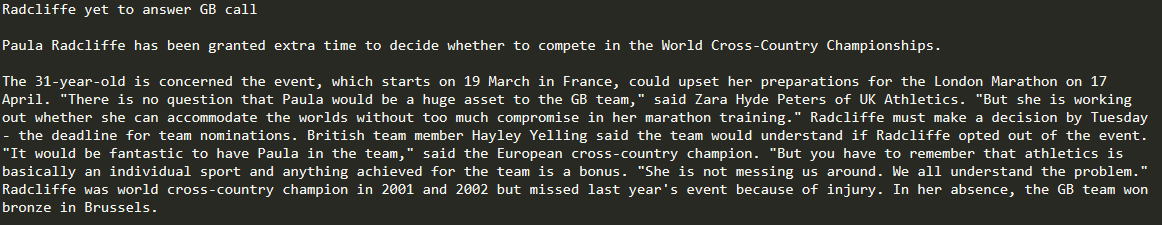

## 3. Kreiranje inicijalnog _dataset_-a

Inicijalni dataset  predstavljen je u formatu _DataFrame_-a koji ima sledeće kolone:

In [1]:
import os
import pandas as pd

df = pd.DataFrame(columns=['File_name', 'Title', 'Content', 'Category', 'Class'])

Formiran je iščitavanjem pojedinačnih _.txt_ fajlova iz foldera određene kategorije. Na osnovu toga inicijalno je poznata klasa kojoj svaki od fajlova pripada.

In [2]:
df = pd.DataFrame(columns=['File_name', 'Title', 'Content', 'Category', 'Class'])

pathB = 'C:/Users/Spale/Desktop/treca godina/drugi semestar/ORI/projekat/datasets/bbc/business'
pathE = 'C:/Users/Spale/Desktop/treca godina/drugi semestar/ORI/projekat/datasets/bbc/entertainment'
pathP = 'C:/Users/Spale/Desktop/treca godina/drugi semestar/ORI/projekat/datasets/bbc/politics'
pathS = 'C:/Users/Spale/Desktop/treca godina/drugi semestar/ORI/projekat/datasets/bbc/sport'
pathT = 'C:/Users/Spale/Desktop/treca godina/drugi semestar/ORI/projekat/datasets/bbc/tech'

def reading_files(df, path, category, class_num, index):
    for file in os.listdir(path):
        with open(path + '/' + file, 'rt') as f:
            title = f.readline()
            content = f.read()
            parts = file.split('.')
            file_name = parts[0]
            index += 1
            df.loc[index] = [file_name, title, content, category, class_num]
    return len(df.index)
    len(df)


i = 0
i = reading_files(df, pathB, 'business', 0, i)
i = reading_files(df, pathE, 'entertainment', 1, i)
i = reading_files(df, pathP, 'politics', 2, i)
i = reading_files(df, pathS, 'sport', 3, i)
i = reading_files(df, pathT, 'tech', 4, i)

df.head()

,File_name,Title,Content,Category,Class
1,001,Ad sales boost Time Warner profit\n,\nQuarterly profits at US media giant TimeWarn...,business,0
2,002,Dollar gains on Greenspan speech\n,\nThe dollar has hit its highest level against...,business,0
3,003,Yukos unit buyer faces loan claim\n,\nThe owners of embattled Russian oil giant Yu...,business,0
4,004,High fuel prices hit BA's profits\n,\nBritish Airways has blamed high fuel prices ...,business,0
5,005,Pernod takeover talk lifts Domecq\n,\nShares in UK drinks and food firm Allied Dom...,business,0


## 4. Pretprocesiranje podataka

Postupak pretprocesiranja podataka je izuzetno bitan kako bi se otklonile smetnje prilikom obučavanja modela. Takođe u ovom postupku od teksta se kreiraju _feature_-i, koji su neophodni za obučavanje klasifikacionih modela. Pošto će se za obučavanje modela koristiti i naslov vesti - _Title_ i sadržaj - _Content_. Potrebno je obraditi te kolone u _dataset_-u.

### 4.1. Čišćenje teksta
    
Čišćenje teksta podrazumeva: 
* uklanjanje specijalnih karaktera kao što su: "__\n__", "__\r__"

In [3]:
# special character cleaning
df['Title_Parsed_1'] = df['Title'].str.replace("\r", " ")
df['Title_Parsed_1'] = df['Title_Parsed_1'].str.replace("\n", " ")

df['Content_Parsed_1'] = df['Content'].str.replace("\r", " ")
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("\n", " ")

df.loc[1]['Content_Parsed_1']

' Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL\'s existing customers for high

* pretvaranje svih slova u mala

In [4]:
# lowercasing the text from Title and Content
df['Title_Parsed_2'] = df['Title_Parsed_1'].str.lower()
df['Content_Parsed_2'] = df['Content_Parsed_1'].str.lower()

df.loc[1]['Content_Parsed_2']

' quarterly profits at us media giant timewarner jumped 76% to $1.13bn (â£600m) for the three months to december, from $639m year-earlier.  the firm, which is now one of the biggest investors in google, benefited from sales of high-speed internet connections and higher advert sales. timewarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. its profits were buoyed by one-off gains which offset a profit dip at warner bros, and less users for aol.  time warner said on friday that it now owns 8% of search-engine google. but its own internet business, aol, had has mixed fortunes. it lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. however, the company said aol\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aol\'s existing customers for high

* uklanjanje znakova interpunkcije: __? : ! . , ; "__

In [5]:
# removing punstiation signs from Title and Content
punctuation_signs = list('?:!.,;"')
df['Content_Parsed_3'] = df['Content_Parsed_2']
df['Title_Parsed_3'] = df['Title_Parsed_2']
for punct_sign in punctuation_signs:
    df['Content_Parsed_3'] = df['Content_Parsed_3'].str.replace(punct_sign, '')
    df['Title_Parsed_3'] = df['Title_Parsed_3'].str.replace(punct_sign, '')
    
df.loc[1]['Content_Parsed_3']

" quarterly profits at us media giant timewarner jumped 76% to $113bn (â£600m) for the three months to december from $639m year-earlier  the firm which is now one of the biggest investors in google benefited from sales of high-speed internet connections and higher advert sales timewarner said fourth quarter sales rose 2% to $111bn from $109bn its profits were buoyed by one-off gains which offset a profit dip at warner bros and less users for aol  time warner said on friday that it now owns 8% of search-engine google but its own internet business aol had has mixed fortunes it lost 464000 subscribers in the fourth quarter profits were lower than in the preceding three quarters however the company said aol's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aol's existing customers for high-speed broadband time

* lematizacija - svaku promenljivu vrstu reči pretvoriti u njen osnovni oblik. U ovom projektu proces lematizacije primenjen je samo na glagole.

In [6]:
import nltk

# downloading punkt and wordnet from NLTK
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Spale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Spale\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()
num_rows = len(df)

# CONTENT LEMMATIZATION
lemmatized_text_list = []
for row in range(1, num_rows+1):

    # create an empty list containing lemmatized words
    lemmatized_list = []

    # save the text and its words into an object
    text = df.loc[row]['Content_Parsed_3']
    text_words = text.split(" ")

    # iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v")) 

    # join the list
    lemmatized_text = " ".join(lemmatized_list)

    # append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

df['Content_Parsed_4'] = lemmatized_text_list

# TITLE LEMMATIZATION
lemmatized_text_list = []

for row in range(1, num_rows+1):

    # create an empty list containing lemmatized words
    lemmatized_list = []

    # save the text and its words into an object
    text = df.loc[row]['Title_Parsed_3']
    text_words = text.split(" ")

    # iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v")) 
    # join the list
    lemmatized_text = " ".join(lemmatized_list)

    # append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

df['Title_Parsed_4'] = lemmatized_text_list

df.loc[1]['Content_Parsed_4']

" quarterly profit at us media giant timewarner jump 76% to $113bn (â£600m) for the three months to december from $639m year-earlier  the firm which be now one of the biggest investors in google benefit from sales of high-speed internet connections and higher advert sales timewarner say fourth quarter sales rise 2% to $111bn from $109bn its profit be buoy by one-off gain which offset a profit dip at warner bros and less users for aol  time warner say on friday that it now own 8% of search-engine google but its own internet business aol have have mix fortunes it lose 464000 subscribers in the fourth quarter profit be lower than in the precede three quarter however the company say aol's underlie profit before exceptional items rise 8% on the back of stronger internet advertise revenues it hop to increase subscribers by offer the online service free to timewarner internet customers and will try to sign up aol's exist customers for high-speed broadband timewarner also have to restate 2000 

* izbacivanje _stop words_ koje nemaju prediktivni značaj

In [8]:
from nltk.corpus import stopwords

# reamovig stop words
# downloading the stop words list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Spale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# loading the stop words in english
stop_words = list(stopwords.words('english'))
df['Content_Parsed_5'] = df['Content_Parsed_4']
df['Title_Parsed_5'] = df['Title_Parsed_4']

for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['Content_Parsed_5'] = df['Content_Parsed_5'].astype(str).str.replace(regex_stopword, '')
    df['Title_Parsed_5'] = df['Title_Parsed_5'].astype(str).str.replace(regex_stopword, '')
    
df.loc[1]['Content_Parsed_5']

" quarterly profit  us media giant timewarner jump 76%  $113bn (â£600m)   three months  december  $639m year-earlier   firm    one   biggest investors  google benefit  sales  high-speed internet connections  higher advert sales timewarner say fourth quarter sales rise 2%  $111bn  $109bn  profit  buoy  one- gain  offset  profit dip  warner bros  less users  aol  time warner say  friday     8%  search-engine google    internet business aol   mix fortunes  lose 464000 subscribers   fourth quarter profit  lower    precede three quarter however  company say aol' underlie profit  exceptional items rise 8%   back  stronger internet advertise revenues  hop  increase subscribers  offer  online service free  timewarner internet customers   try  sign  aol' exist customers  high-speed broadband timewarner also   restate 2000  2003 result follow  probe   us securities exchange commission (sec)   close  conclude  time warner' fourth quarter profit  slightly better  analysts' expectations   film divi

Krajnji izgled _dataset_-a nakon obrade podataka:

In [10]:
list_columns = ['File_name', 'Title', 'Title_Parsed_5', 'Content', 'Content_Parsed_5', 'Category', 'Class']
df = df[list_columns]
df = df.rename(columns={'Content_Parsed_5': 'Content_Parsed', 'Title_Parsed_5': 'Title_Parsed'})

df['Title_and_Content_Parsed'] = df['Title_Parsed'] + df['Content_Parsed']

df.head(5)

,File_name,Title,Title_Parsed,Content,Content_Parsed,Category,Class,Title_and_Content_Parsed
1,001,Ad sales boost Time Warner profit\n,ad sales boost time warner profit,\nQuarterly profits at US media giant TimeWarn...,quarterly profit us media giant timewarner j...,business,0,ad sales boost time warner profit quarterly p...
2,002,Dollar gains on Greenspan speech\n,dollar gain greenspan speech,\nThe dollar has hit its highest level against...,dollar hit highest level euro almost th...,business,0,dollar gain greenspan speech dollar hit h...
3,003,Yukos unit buyer faces loan claim\n,yukos unit buyer face loan claim,\nThe owners of embattled Russian oil giant Yu...,owners embattle russian oil giant yukos a...,business,0,yukos unit buyer face loan claim owners emb...
4,004,High fuel prices hit BA's profits\n,high fuel price hit ba' profit,\nBritish Airways has blamed high fuel prices ...,british airways blame high fuel price 40% ...,business,0,high fuel price hit ba' profit british airway...
5,005,Pernod takeover talk lifts Domecq\n,pernod takeover talk lift domecq,\nShares in UK drinks and food firm Allied Dom...,share uk drink food firm ally domecq rise ...,business,0,pernod takeover talk lift domecq share uk dr...


### 4.2. Train - test split

Potrebno je razdvojiti obučavajući skup od test skupa. Test skup je neophodan da bi se mogao ustanoviti kvalitet modela nakog predikcije podataka koje do tada nije video. Pre izvršavanja ovog segmenta, potrebno je ponovo naglasiti da će se obučavanje i predikcija vršiti:
* na osnovu samo naslova vesti
* na osnovu naslova i sadržaja

Prilikom podele podataka na obučavajući i test skup, 15% podataka koristiće se za test skup, a 85% podataka za obučavajući skup. 

#### 4.2.1. Samo naslovi

In [11]:
from sklearn.model_selection import train_test_split

# forming train and test data
y = df['Class'] 
X = df['Title_Parsed']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

#### 4.2.2. Naslovi i sadržaj

In [19]:
# forming train and test data
y = df['Class']
X = df['Title_and_Content_Parsed']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

### 4.3. Reprezentacija teksta

Za reprezentaciju teksta odabran je TF-IDF. TF-IDF predstavlja relativnu važnost nekog termina u dokumentu i celom korpusu reči. TF je skraćenica za _Term Frequency_, a IDF za _Inverse Document Frequency_. TF-IDF skor se računa na sledeći način: 

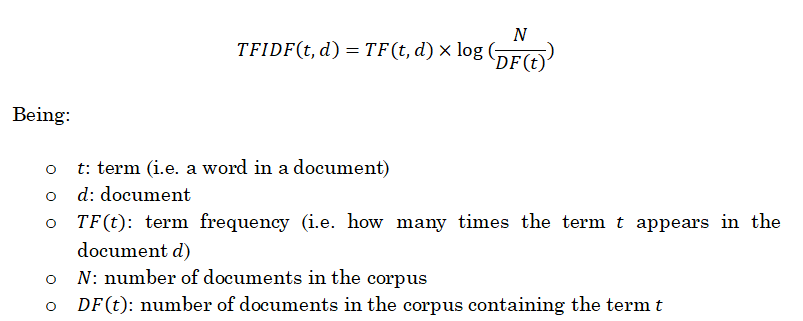

TF-IDF je odabran za reprezentaciju teksta u ovom projektu zato što je jednostavan i brzo kreira feature-e, a daje dobre rezultate.

Prilikom korišćenja TF-IDF, potrebno je podesiti neke od parametara:

* ngram_range = (1,2) - za vrednosti 1 i 2 u obzir će biti uzeti unigrami i bigrami. Očekuje se da će bigrami pomoći za poboljšanje performansi modela, tako što će se u obzir uzimati i reči koje se u dokumentima pojavljuju zajedno.
* min_df = 10 - rešavamo se retkih reči, koje se pojavljuju u manje od 10 dokumenata.
* max_df = 0.8 - prilikom formiranja vokabulara ignorišu se termini koji imaju Document Frequency (DF) striktno veću od date.
* max_features = 2000 - formira se vokabular koji uzima u obzir samo prvih 2000 termina poređanih po _term frequency_ u korpusu.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# text representation: TF-IDF Vectors
# parameter election
ngram_range = (1,2)
min_df = 10 
max_df = 0.8 
max_features = 2000

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
labels_train = y_train.astype(int) 

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
labels_test = y_test.astype(int)

## 5. Obučavanje modela

Za obučavanje modela koristiće se 4 klasifikaciona algoritma nadgledanog učenja:

* __Naïve Bayes__

Ovo je probabilistički algoritam, koji se zasniva na Bayes-ovoj teoremi:

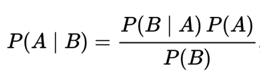

Određuje verovatnoću da dokument B pripada klasi A.

* __Support Vector Machine (SVM)__

Zasnovan je na ideji pronalaska optimalne granice (hyperplane), koja najbolje razdvaja podatke u različite klase.

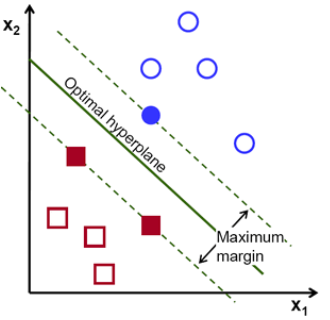

* __Random Forest__

Ovaj algoritam sastoji se od velikog broja stabala odlučivanja (decision trees). Svako stablo računa svoju procenu i daje svoj glas za neku klasu, pa se klasa sa najviše glasova bira kao prediktovana.

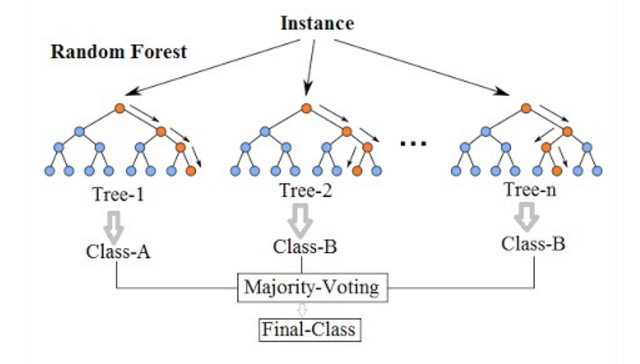

* __K Nearest Neighbors (KNN)__

Kod ovog algoritma obučavanje se zasniva na tome koliko je neklasifikovan podatak "sličan" u odnosu na klasifikovane, tako što se meri razdaljina između neklasifikovanog podatka i svih ostalih podataka i bira se K najbližih komšija.

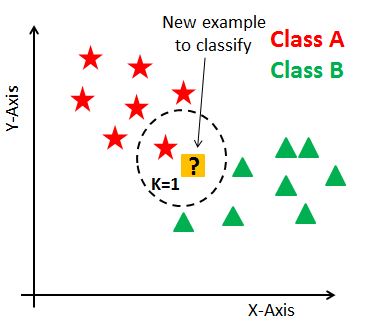

### 5.1. Obučavanje modela na osnovu samo naslova

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# ** Multinomial Naïve Bayes **
mnbc = MultinomialNB()
mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

The training accuracy is: 
0.6737176097303015
The test accuracy is: 
0.5868263473053892
Classification report
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        81
           1       0.76      0.51      0.61        49
           2       0.72      0.53      0.61        72
           3       0.43      0.83      0.56        72
           4       0.62      0.33      0.43        60

    accuracy                           0.59       334
   macro avg       0.65      0.57      0.58       334
weighted avg       0.64      0.59      0.58       334



Multinomial Naïve Bayes se koristi kada su ulazni podaci diskretni, a Gaussian Naïve Bayes kada su ulazni podaci kontinualni. Zato se očekuje da će se bolji rezultati dobiti korišćenjem Multinomial Naïve Bayes klasifikatora, što je i dobijeno.

In [14]:
from sklearn.naive_bayes import GaussianNB

# ** Gaussian Naïve Bayes **
gnb = GaussianNB()
gnb.fit(features_train, labels_train)
gnb_pred = gnb.predict(features_test)

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, gnb.predict(features_train)))

# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, gnb_pred))

# Classification report
print("Classification report")
print(classification_report(labels_test,gnb_pred))

The training accuracy is: 
0.6033844526705446
The test accuracy is: 
0.49700598802395207
Classification report
              precision    recall  f1-score   support

           0       0.95      0.25      0.39        81
           1       0.38      0.53      0.44        49
           2       0.62      0.58      0.60        72
           3       0.41      0.83      0.55        72
           4       0.58      0.30      0.40        60

    accuracy                           0.50       334
   macro avg       0.59      0.50      0.48       334
weighted avg       0.61      0.50      0.48       334



In [15]:
from sklearn import svm

# ** Support Vector Machine **
svm_class = svm.SVC(kernel="linear")
svm_class.fit(features_train, labels_train)
svm_class_pred = svm_class.predict(features_test)

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, svm_class.predict(features_train)))

# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, svm_class_pred))

# Classification report
print("Classification report")
print(classification_report(labels_test, svm_class_pred))

The training accuracy is: 
0.6832363828662084
The test accuracy is: 
0.5778443113772455
Classification report
              precision    recall  f1-score   support

           0       0.66      0.64      0.65        81
           1       0.70      0.47      0.56        49
           2       0.71      0.51      0.60        72
           3       0.44      0.86      0.58        72
           4       0.66      0.32      0.43        60

    accuracy                           0.58       334
   macro avg       0.63      0.56      0.56       334
weighted avg       0.63      0.58      0.57       334



In [16]:
from sklearn.ensemble import RandomForestClassifier

# ** Random Forest **
rf = RandomForestClassifier(random_state=0, n_estimators=100, bootstrap=True, max_features="sqrt")
rf.fit(features_train, labels_train)
rf_pred = rf.predict(features_test)

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, rf.predict(features_train)))

# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, rf_pred))

# Classification report
print("Classification report")
print(classification_report(labels_test, rf_pred))

The training accuracy is: 
0.7593865679534638
The test accuracy is: 
0.5838323353293413
Classification report
              precision    recall  f1-score   support

           0       0.68      0.64      0.66        81
           1       0.67      0.53      0.59        49
           2       0.76      0.51      0.61        72
           3       0.43      0.75      0.54        72
           4       0.60      0.43      0.50        60

    accuracy                           0.58       334
   macro avg       0.63      0.57      0.58       334
weighted avg       0.63      0.58      0.59       334



In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ** K Nearest Neighbors **
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(features_train, labels_train)
knn_class_pred = knn_class.predict(features_test)

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, knn_class.predict(features_train)))

# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knn_class_pred))

# Classification report
print("Classification report")
print(classification_report(labels_test, knn_class_pred))

The training accuracy is: 
0.6499206768905341
The test accuracy is: 
0.5149700598802395
Classification report
              precision    recall  f1-score   support

           0       0.70      0.47      0.56        81
           1       0.46      0.53      0.50        49
           2       0.62      0.44      0.52        72
           3       0.40      0.76      0.53        72
           4       0.58      0.35      0.44        60

    accuracy                           0.51       334
   macro avg       0.55      0.51      0.51       334
weighted avg       0.56      0.51      0.51       334



Confusion matrix: 
[[38 10  8 17  8]
 [ 3 26  4 15  1]
 [ 7  4 32 26  3]
 [ 3  6  5 55  3]
 [ 3 10  3 23 21]]


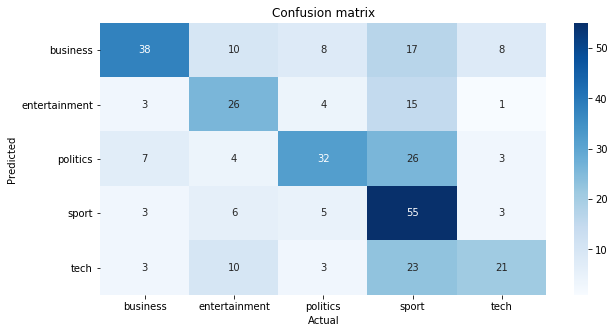

In [18]:
# Confusion matrix
aux_df = df[['Category', 'Class']].drop_duplicates().sort_values('Class')
conf_matrix = confusion_matrix(labels_test, knn_class_pred)
print("Confusion matrix: ")
print(conf_matrix)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=aux_df['Category'].values,
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

### 5.2. Obučavanje modela na osnovu naslova i sadržaja

In [21]:
# ** Multinomial Naïve Bayes **
mnbc = MultinomialNB()
mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

The training accuracy is: 
0.9820200951877314
The test accuracy is: 
0.9580838323353293
Classification report
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        81
           1       0.96      0.92      0.94        49
           2       0.99      0.97      0.98        72
           3       0.99      1.00      0.99        72
           4       0.96      0.92      0.94        60

    accuracy                           0.96       334
   macro avg       0.96      0.95      0.96       334
weighted avg       0.96      0.96      0.96       334



In [22]:
# ** Gaussian Naïve Bayes **
gnb = GaussianNB()
gnb.fit(features_train, labels_train)
gnb_pred = gnb.predict(features_test)

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, gnb.predict(features_train)))

# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, gnb_pred))

# Classification report
print("Classification report")
print(classification_report(labels_test,gnb_pred))

The training accuracy is: 
0.9952406134320465
The test accuracy is: 
0.8982035928143712
Classification report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        81
           1       0.84      0.78      0.81        49
           2       0.96      0.90      0.93        72
           3       1.00      0.92      0.96        72
           4       0.78      0.98      0.87        60

    accuracy                           0.90       334
   macro avg       0.90      0.89      0.89       334
weighted avg       0.91      0.90      0.90       334



In [23]:
# ** Support Vector Machine **
svm_class = svm.SVC(kernel="linear")
svm_class.fit(features_train, labels_train)
svm_class_pred = svm_class.predict(features_test)

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, svm_class.predict(features_train)))

# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, svm_class_pred))

# Classification report
print("Classification report")
print(classification_report(labels_test, svm_class_pred))

The training accuracy is: 
0.9989423585404548
The test accuracy is: 
0.9850299401197605
Classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        81
           1       0.96      0.96      0.96        49
           2       1.00      0.99      0.99        72
           3       1.00      1.00      1.00        72
           4       0.98      1.00      0.99        60

    accuracy                           0.99       334
   macro avg       0.98      0.98      0.98       334
weighted avg       0.99      0.99      0.99       334



In [24]:
# ** Random Forest **
rf = RandomForestClassifier(random_state=0, n_estimators=100, bootstrap=True, max_features="sqrt")
rf.fit(features_train, labels_train)
rf_pred = rf.predict(features_test)

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, rf.predict(features_train)))

# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, rf_pred))

# Classification report
print("Classification report")
print(classification_report(labels_test, rf_pred))

The training accuracy is: 
1.0
The test accuracy is: 
0.9520958083832335
Classification report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        81
           1       0.96      0.92      0.94        49
           2       0.99      0.92      0.95        72
           3       0.99      0.99      0.99        72
           4       0.98      0.93      0.96        60

    accuracy                           0.95       334
   macro avg       0.96      0.95      0.95       334
weighted avg       0.96      0.95      0.95       334



In [25]:
# ** K Nearest Neighbors **
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(features_train, labels_train)
knn_class_pred = knn_class.predict(features_test)

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, knn_class.predict(features_train)))

# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knn_class_pred))

# Classification report
print("Classification report")
print(classification_report(labels_test, knn_class_pred))

The training accuracy is: 
0.9788471708090957
The test accuracy is: 
0.9670658682634731
Classification report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        81
           1       0.98      0.92      0.95        49
           2       0.97      0.97      0.97        72
           3       1.00      0.97      0.99        72
           4       0.95      1.00      0.98        60

    accuracy                           0.97       334
   macro avg       0.97      0.97      0.97       334
weighted avg       0.97      0.97      0.97       334



Confusion matrix: 
[[78  0  2  0  1]
 [ 2 45  0  0  2]
 [ 1  1 70  0  0]
 [ 2  0  0 70  0]
 [ 0  0  0  0 60]]


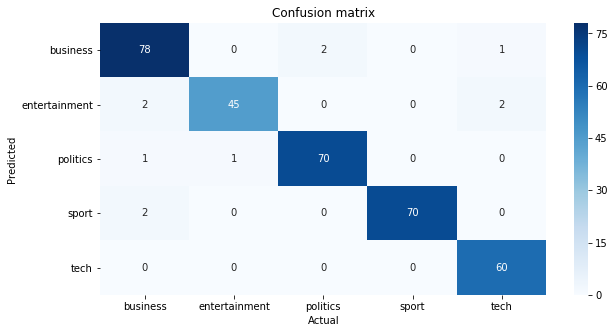

In [26]:
# Confusion matrix
aux_df = df[['Category', 'Class']].drop_duplicates().sort_values('Class')
conf_matrix = confusion_matrix(labels_test, knn_class_pred)
print("Confusion matrix: ")
print(conf_matrix)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix,
            annot=True,
            xticklabels=aux_df['Category'].values,
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

## 6. Odabir modela koji daje najbolje rezultate

Na osnovu dobijenih podataka može se zaključiti da neki modeli predobro modeluju obučavajući skup podataka, pa dolazi do ___overfitting___-a. To se vidi na osnovu _training accuracy_ koja je u slučaju primene Gaussian Naïve Bayes, Support Vector Machine i Random Forest previsoka. Stoga ti modeli nisu kandidati za odabir najboljeg modela. Dakle, od preostalih modela, model koji daje najbolju __test accuracy__ je __K Nearest Neighbors__. 

## Zaključak

Kao što se moglo pretpostaviti, bolji rezultati se dobijaju kada se obučavajući skup formira na osnovu i naslova i sadržaja vesti, nego kada se on formira samo na osnovu naslova vesti. Dokaz za to su male vrednosti za _test accuracy_ kod modela koji se obučavaju samo na osnovu naslova. 

Ako posmatramo samo _test accuracy_ kod modela koji su obučavani samo na osnovu naslova, model koji dalje najbolje rezultate je Random Forest, a model koji dalje najlošije rezultate je Gaussian Naïve Bayes. Sa druge strane, ako posmatramo samo _test accuracy_ kod modela koji su obučavani na osnovu i naslova i sadržaja, model koji daje najbolje rezultate je Support Vector Machine, a model koji daje najlošije rezultate je ponovo Gaussian Naïve Bayes.